Visualizing sitka rainfall precipitation.

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import csv

Extracting the filename to use

In [2]:
filename = 'data/3478008.csv'
# little_canada = 'data/3478007.csv'

Reading the file and identifying the rows

In [3]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    # Get high temperatures from this file.
    for index, column in enumerate(header_row):
        print(index, column)

0 STATION
1 NAME
2 LATITUDE
3 LONGITUDE
4 ELEVATION
5 DATE
6 AWND
7 PGTM
8 PRCP
9 TAVG
10 TMAX
11 TMIN
12 WDF2
13 WDF5
14 WSF2
15 WSF5
16 WT01
17 WT02
18 WT03
19 WT04
20 WT05
21 WT08
22 WT09


Identifying the row indexes

In [4]:
high_row = header_row.index('TMAX')
low_row = header_row.index('TMIN')
date_row = header_row.index('DATE')

Saving all the data in lists

In [5]:
with open(filename) as f:
    reader = csv.reader(f)
    next(reader)
    dates, highs, lows = [], [], []
    
    for row in reader:
        current_date = datetime.strptime(row[date_row], '%Y-%m-%d')
        try:
            high = float(row[high_row])
            low = float(row[low_row])
        except ValueError:
            print(current_date, 'missing data')
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)

2019-01-31 00:00:00 missing data
2020-10-26 00:00:00 missing data
2021-04-23 00:00:00 missing data


Plotting the data

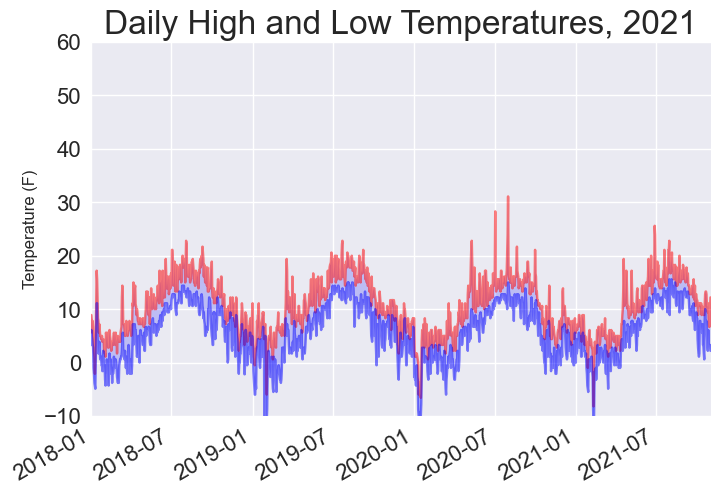

In [6]:
import datetime

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
ax.set_title("Daily High and Low Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=12)
ax.tick_params(labelsize=16)
# ax.margins(0.2, 0.2)
ax.set_ylim(-10, 60)

# Fix the code below
ax.set_xlim([datetime.date(2018, 1, 1), datetime.date(2021, 11, 1)])
# End of the fixed code

ax.autoscale(enable=None, axis='x', tight=True)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Plot the data
plt.show()


Comporison between sitka and little canada